In [235]:
import warnings
warnings.filterwarnings('ignore')

In [236]:
#EDA libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [238]:
#For full view of rows and columns. 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [239]:
#importing the dataset
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Understanding

In [240]:
lead_df.shape

(9240, 37)

In [241]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [242]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [243]:
(lead_df.isnull().sum()/len(lead_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [244]:
# Function for determing percentage of null values in columns of dataframe
def Null_perc_features(dataframe):
    df = pd.DataFrame(round(((dataframe.isnull().sum()/len(dataframe))*100).sort_values(ascending=False),2)).reset_index()
    df.columns = ['Features','Null_percent']
    return df
# Function for determing percentage of null values greater than 0 in columns of dataframe
def True_Null_Features(dataframe):
    df = Null_perc_features(dataframe)
    df = df[df['Null_percent']>0]
    return df

In [245]:
Null_perc_features(lead_df)

,Features,Null_percent
0,Lead Quality,51.59
1,Asymmetrique Activity Index,45.65
2,Asymmetrique Profile Score,45.65
3,Asymmetrique Activity Score,45.65
4,Asymmetrique Profile Index,45.65
5,Tags,36.29
6,Lead Profile,29.32
7,What matters most to you in choosing a course,29.32
8,What is your current occupation,29.11
9,Country,26.63


In [246]:
True_Null_Features(lead_df)

,Features,Null_percent
0,Lead Quality,51.59
1,Asymmetrique Activity Index,45.65
2,Asymmetrique Profile Score,45.65
3,Asymmetrique Activity Score,45.65
4,Asymmetrique Profile Index,45.65
5,Tags,36.29
6,Lead Profile,29.32
7,What matters most to you in choosing a course,29.32
8,What is your current occupation,29.11
9,Country,26.63


In [247]:
#Converting 'Select' values to NaN.

lead_df = lead_df.replace('Select', np.nan)

In [248]:
True_Null_Features(lead_df)

,Features,Null_percent
0,How did you hear about X Education,78.46
1,Lead Profile,74.19
2,Lead Quality,51.59
3,Asymmetrique Profile Score,45.65
4,Asymmetrique Activity Score,45.65
5,Asymmetrique Activity Index,45.65
6,Asymmetrique Profile Index,45.65
7,City,39.71
8,Specialization,36.58
9,Tags,36.29


In [249]:
# Dropping columns with more than X% null percentage.
def drop_columns(dataframe,percent):
    null_dataframe=Null_perc_features(dataframe)
    drop_cols = list(null_dataframe[null_dataframe['Null_percent']>percent]['Features'])
    dataframe =  dataframe.drop(columns=drop_cols,axis=1)
    return dataframe

In [250]:
#Dropping variables with more than 40% missing values.

lead_df=drop_columns(lead_df,percent=40)

In [251]:
True_Null_Features(lead_df)

,Features,Null_percent
0,City,39.71
1,Specialization,36.58
2,Tags,36.29
3,What matters most to you in choosing a course,29.32
4,What is your current occupation,29.11
5,Country,26.63
6,Page Views Per Visit,1.48
7,TotalVisits,1.48
8,Last Activity,1.11
9,Lead Source,0.39


#### Missing Values

In [252]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [253]:
cat_df = lead_df.select_dtypes(include='object')

#### Checkpoint-1

In [254]:
lead_df1 = lead_df.copy()

In [255]:
cat_df['Converted'] = lead_df['Converted'].copy()

In [256]:
cat_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified,1


In [257]:
True_Null_Features(cat_df)

,Features,Null_percent
0,City,39.71
1,Specialization,36.58
2,Tags,36.29
3,What matters most to you in choosing a course,29.32
4,What is your current occupation,29.11
5,Country,26.63
6,Last Activity,1.11
7,Lead Source,0.39


In [258]:
#Function for assigning null values to separate category--'Missing'
def Miss_cat(df,col):
    df[col] = df[col].replace(np.nan,'Missing')
    return df

In [259]:
#Countplot with hue--'Converted'
def VsConverted(df,col):
    plt.figure(figsize=(15,5))
    s=sns.countplot(df[col], hue=df['Converted'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

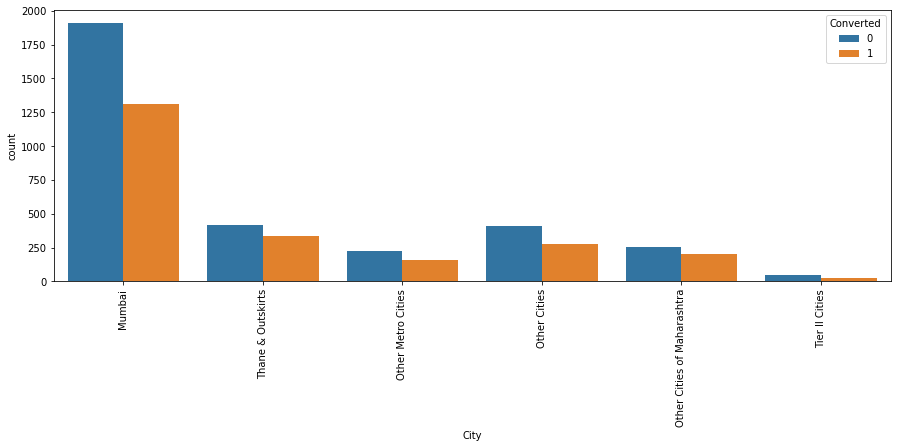

In [260]:
VsConverted(cat_df,'City')

In [261]:
cat_df=Miss_cat(cat_df,'City')

In [262]:
cat_df['City'].value_counts(dropna=False,normalize=True)*100

Missing                        39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

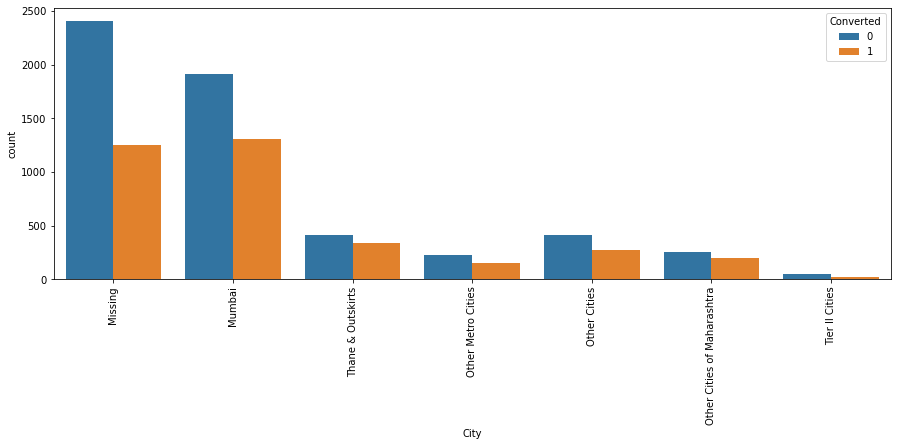

In [263]:
VsConverted(cat_df,'City')

Comments:

We can see that Missing category(null values) has highest % of in terms of number of values.

We can also observe that the number of non-converted(0) is way higher than converted in Missing column which doesn't show any significant pattern or decisive insight on 'Converted'(Target Variable).

If we impute missing values according to traditional practises i.e with mode. 'Mumbai' occupance reaches 64% which increases imbalance in the data.

In [264]:
lead_df1=Miss_cat(lead_df1,'City')

In [265]:
cat_df['Specialization'].value_counts(dropna=False,normalize=True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

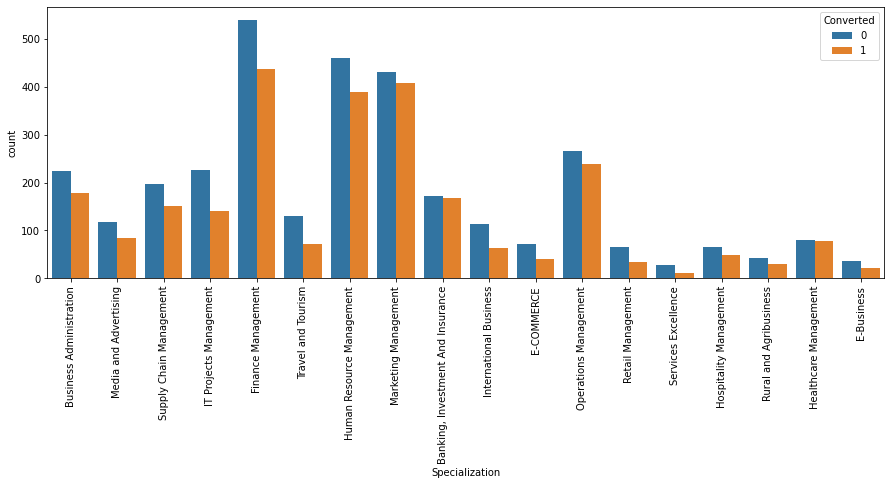

In [266]:
VsConverted(cat_df,'Specialization')

In [267]:
cat_nulldf = Miss_cat(cat_df,'Specialization')

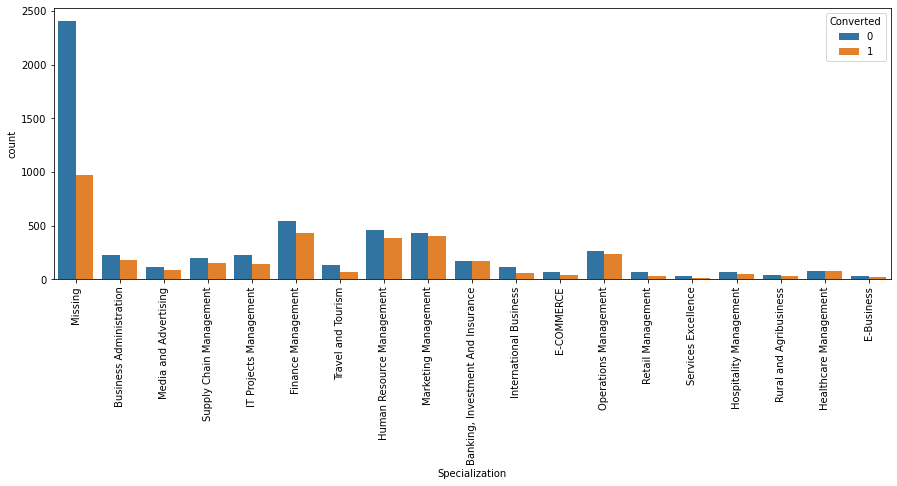

In [268]:
VsConverted(cat_df,'Specialization')

Comments:

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.


In [269]:
lead_df1=Miss_cat(lead_df1,'Specialization')

In [270]:
#combining Management Specializations because they show similar trends

cat_df['Specialization'] = cat_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

lead_df1['Specialization'] = lead_df1['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

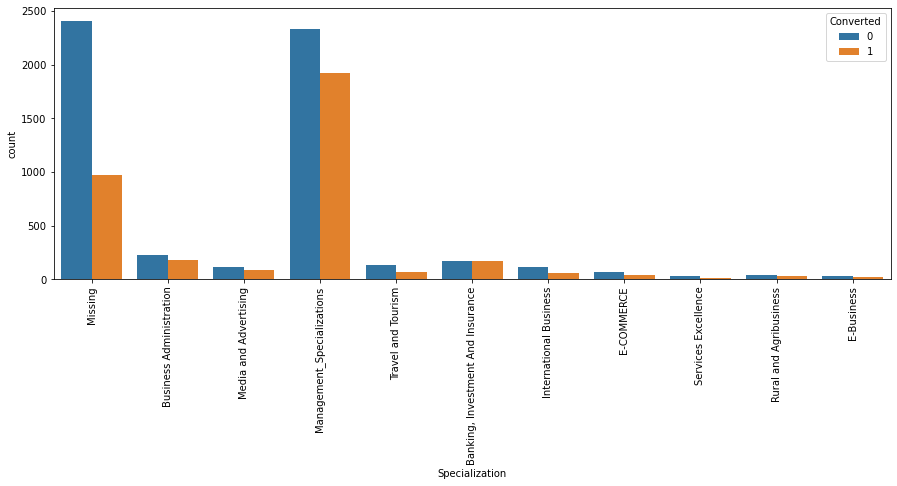

In [271]:
VsConverted(cat_df,'Specialization')

In [272]:
cat_df['Tags'].value_counts(dropna=False,normalize=True)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

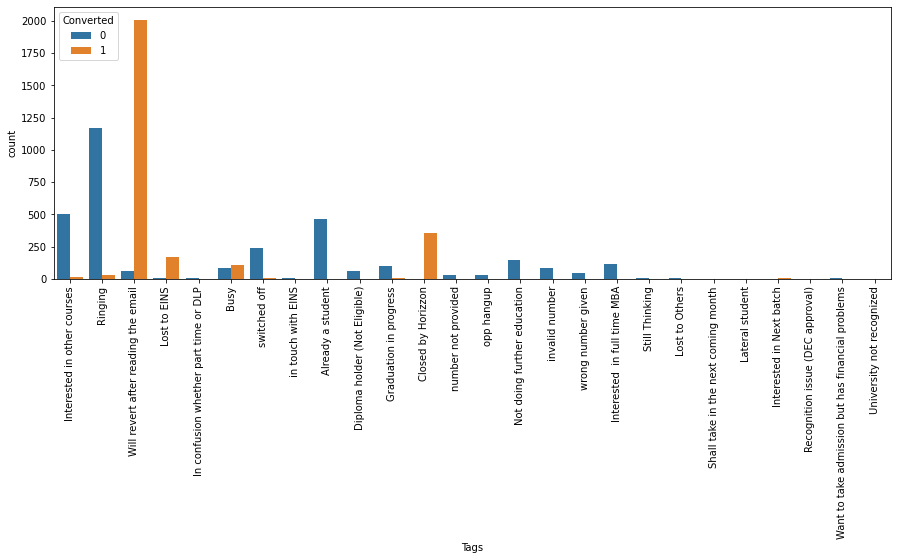

In [273]:
VsConverted(cat_df,'Tags')

In [274]:
cat_nulldf = Miss_cat(cat_df,'Tags')

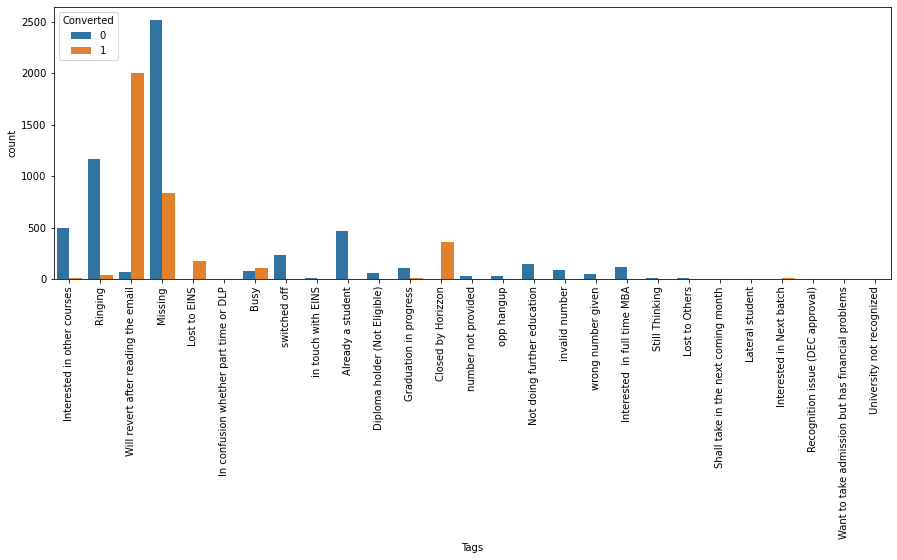

In [275]:
VsConverted(cat_df,'Tags')

In [276]:
#replacing tags with low frequency with "Other Tags"
cat_df['Tags'] = cat_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

cat_df['Tags'] = cat_df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

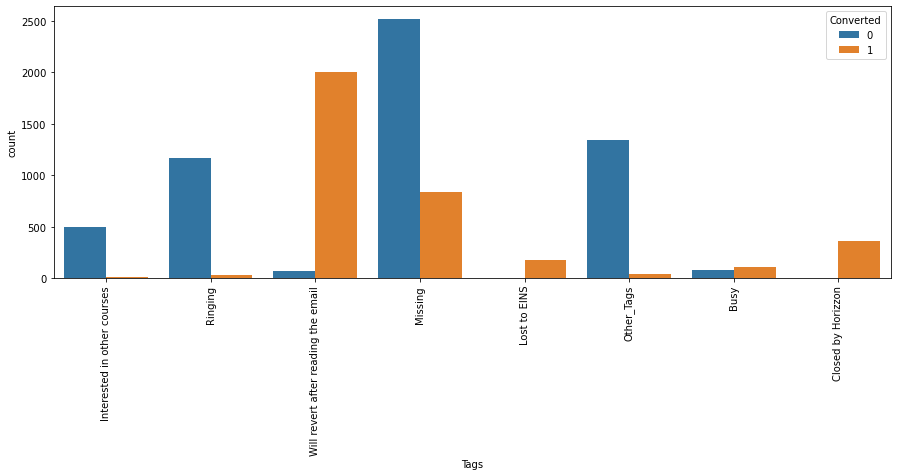

In [277]:
VsConverted(cat_df,'Tags')

Comment:

People with Will revert after reading the email, Lost to EINS, Busy and Closed by Horizzon tags have high conversion rate.

In [278]:
lead_df1=Miss_cat(lead_df1,'Tags')

In [279]:
#replacing tags with low frequency with "Other Tags"
lead_df1['Tags'] = lead_df1['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead_df1['Tags'] = lead_df1['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

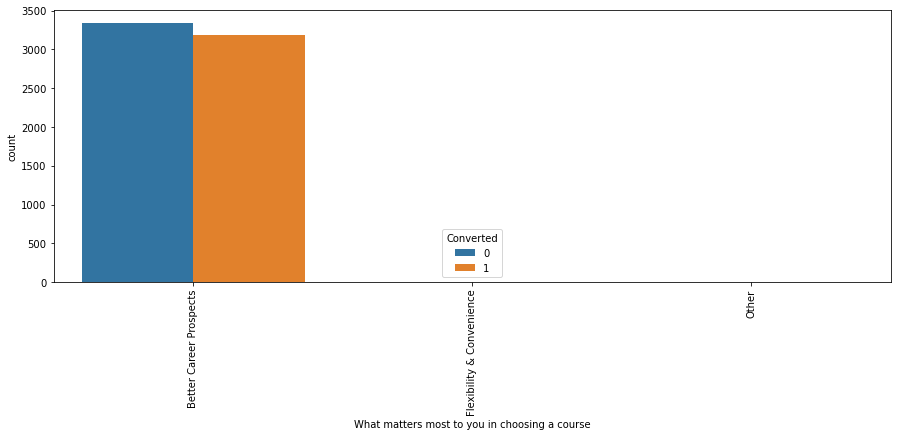

In [280]:
VsConverted(cat_df,'What matters most to you in choosing a course')

In [281]:
cat_df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [282]:
cat_df = Miss_cat(cat_df,'What matters most to you in choosing a course')

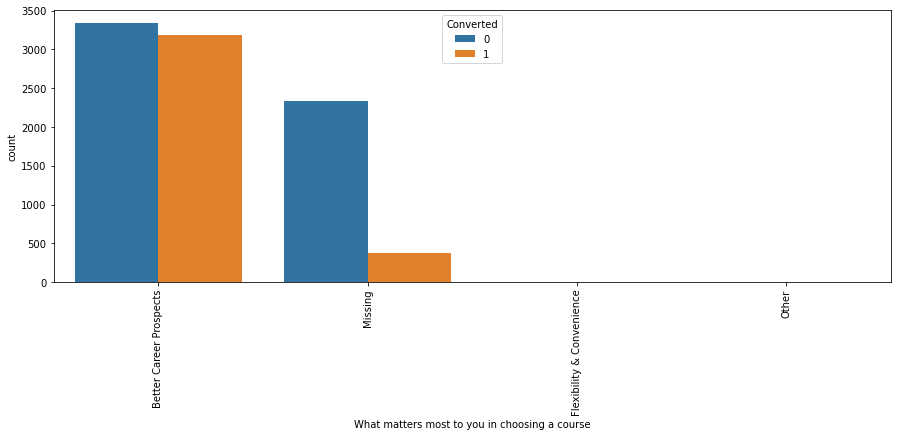

In [283]:
VsConverted(cat_df,'What matters most to you in choosing a course')

Comments:

Most of customers choosing course for better prospects in their career.

In [284]:
cols_to_drop = ['What matters most to you in choosing a course']

In [285]:
cat_df['What is your current occupation'].value_counts(dropna=False,normalize=True)*100 

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

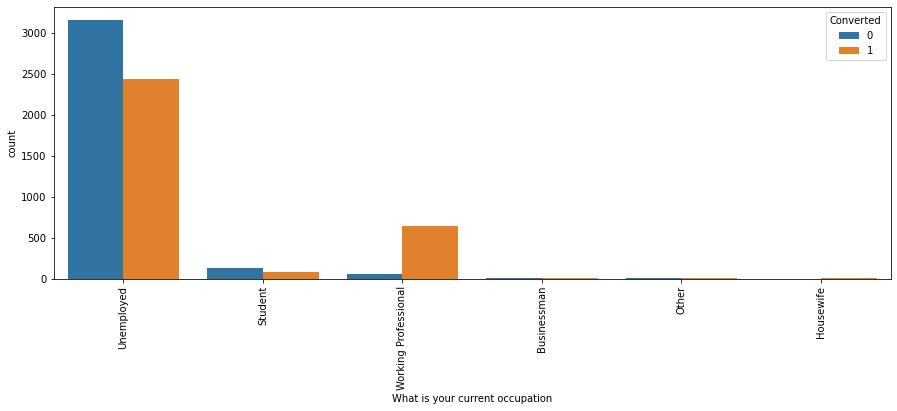

In [286]:
VsConverted(cat_df,'What is your current occupation')

In [287]:
cat_df = Miss_cat(cat_df,'What is your current occupation')

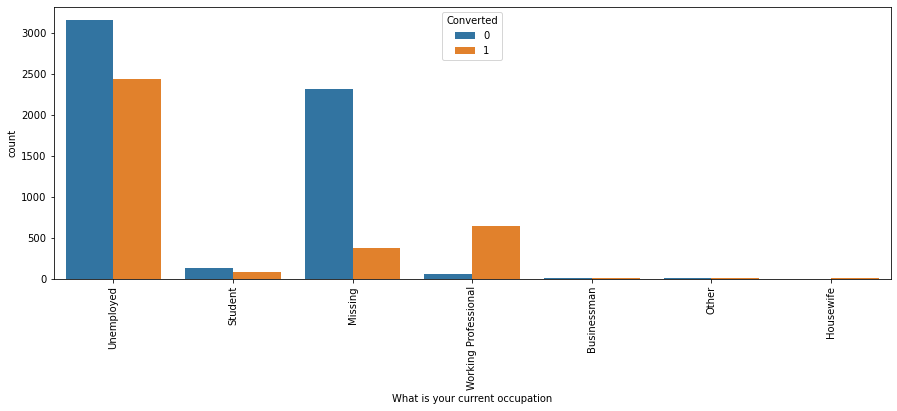

In [288]:
VsConverted(cat_df,'What is your current occupation')

Comment:

People who are unemployed are joining the course more than others.

Also working professional who are looking for a course have high chance of joining it.

Students and others are not showing that much interest in searching and joining the course.

In [289]:
lead_df1=Miss_cat(lead_df1,'What is your current occupation')

Comments:


In [290]:
cat_df['Country'].value_counts(dropna=False,normalize=True)*100 

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Canada                   0.043290
Germany                  0.043290
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Sweden                   0.032468
Belgium                  0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Bangladesh               0.021645
Italy                    0.021645
Netherlands              0.021645
China                    0.021645
Uganda                   0.021645
Philippines              0.021645
Vietnam       

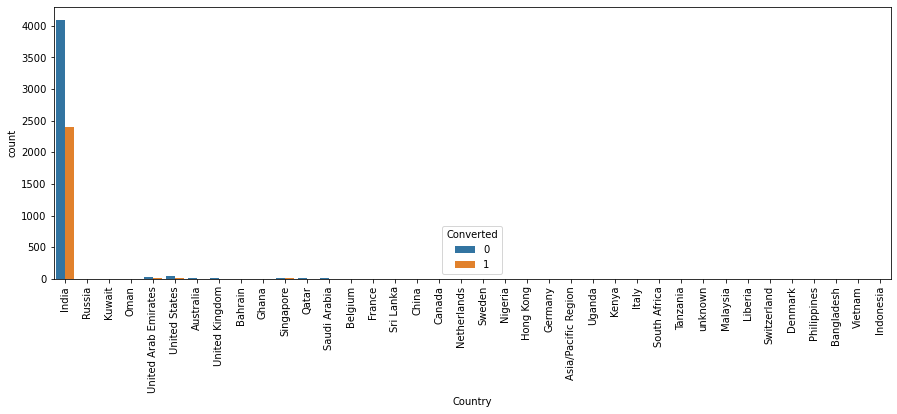

In [291]:
VsConverted(cat_df,'Country')

In [292]:
cat_df = Miss_cat(cat_df,'Country')

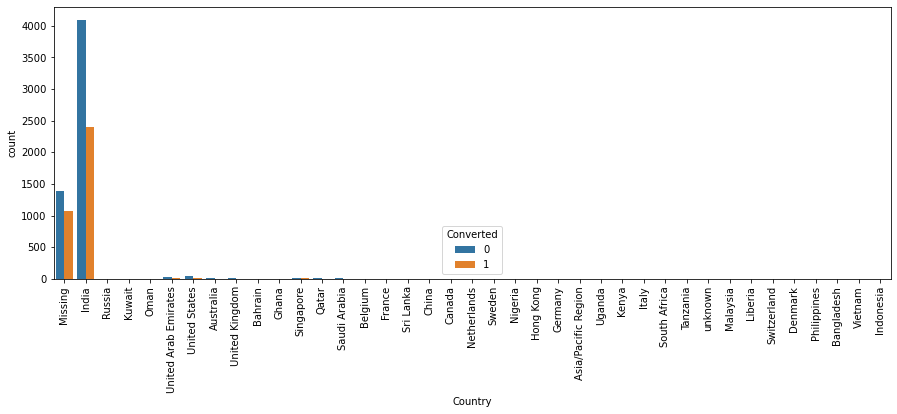

In [293]:
VsConverted(cat_df,'Country')

Comment:

Many of the customers buying the course, are from India

In [294]:
cols_to_drop = ['Country', 'What matters most to you in choosing a course']

In [295]:
cat_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Converted'],
      dtype='object')

In [296]:
True_Null_Features(cat_df)

,Features,Null_percent
0,Last Activity,1.11
1,Lead Source,0.39


In [297]:
cat_df['Last Activity'].value_counts(dropna=False,normalize=True)*100 

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [298]:
#replacing Nan Values and combining low frequency values

cat_df['Last Activity'] = cat_df['Last Activity'].replace(np.nan,'Others')
cat_df['Last Activity'] = cat_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

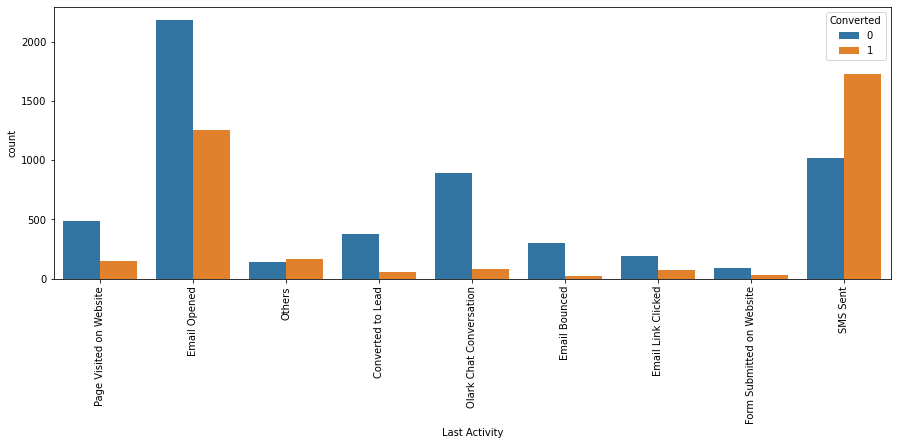

In [299]:
VsConverted(cat_df,'Last Activity')

Comment:

Most of the leads have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.

In [300]:
#replacing Nan Values and combining low frequency values

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan,'Others')
lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [301]:
cat_df['Lead Source'].value_counts(dropna=False,normalize=True)*100 

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
blog                  0.010823
NC_EDM                0.010823
testone               0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [302]:
#replacing Nan Values and combining low frequency values
cat_df['Lead Source'] = cat_df['Lead Source'].replace(np.nan,'Others')
cat_df['Lead Source'] = cat_df['Lead Source'].replace('google','Google')
cat_df['Lead Source'] = cat_df['Lead Source'].replace('Facebook','Social Media')
cat_df['Lead Source'] = cat_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'Live Chat','WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')        

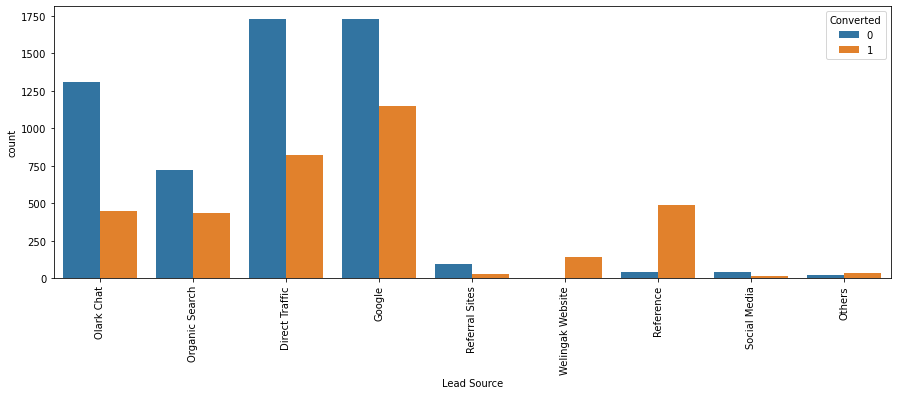

In [303]:
VsConverted(cat_df,'Lead Source')

Comments

Maximum number of leads are generated by Google and Direct traffic.

Conversion Rate of reference leads and leads through welingak website is high.

In [304]:
#replacing Nan Values and combining low frequency values
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(np.nan,'Others')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace('google','Google')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace('Facebook','Social Media')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'Live Chat','WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')        

In [305]:
cat_df['Last Notable Activity'].value_counts(dropna=False,normalize=True)*100 

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Approached upfront               0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [306]:
#clubbing lower frequency values

cat_df['Last Notable Activity'] = cat_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

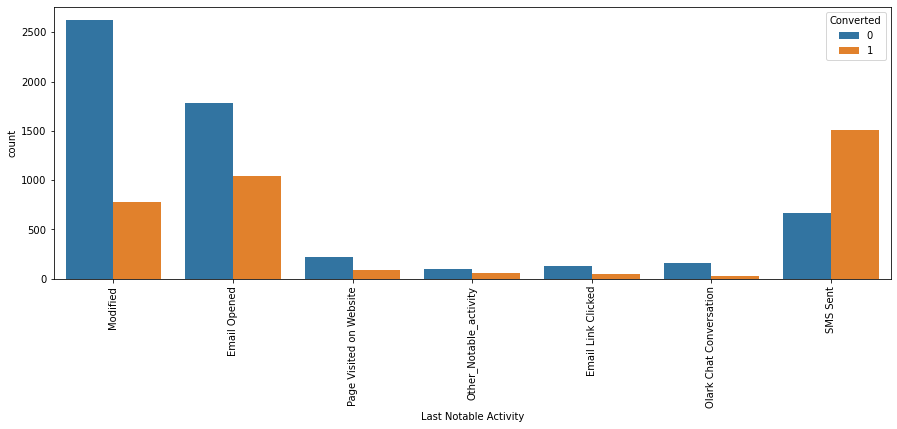

In [307]:
VsConverted(cat_df,'Last Notable Activity')

Comments:

SMS Sent activity is leading to high conversion rate.

Many notable activities are not getting converted. Sufficient importance to be given.

In [308]:
#clubbing lower frequency values

lead_df1['Last Notable Activity'] = lead_df1['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [309]:
cat_df['Lead Origin'].value_counts(dropna=False,normalize=True)*100 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

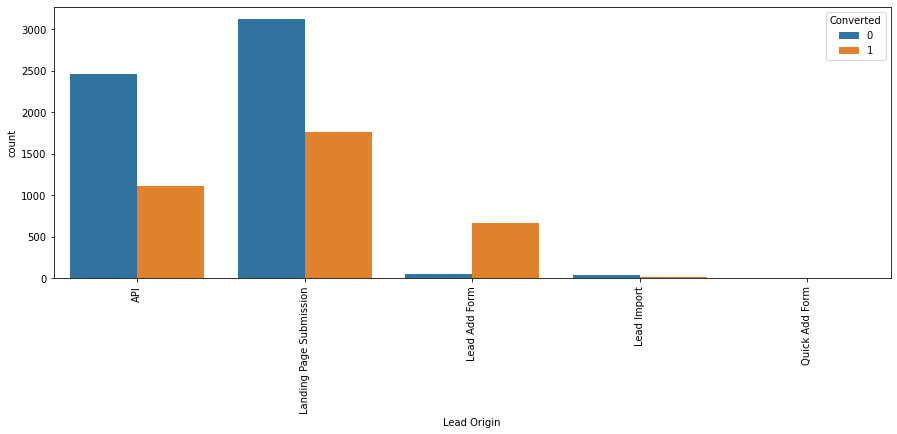

In [310]:
VsConverted(cat_df,'Lead Origin')

Comment:

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

API and Landing Page Submission bring higher number of leads as well as conversion.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [311]:
#Checking number of unique values in each column.
for i in cat_df.select_dtypes(include='object').columns:
    print('{} = {}'.format(i,cat_df[i].nunique()))

Prospect ID = 9240
Lead Origin = 5
Lead Source = 9
Do Not Email = 2
Do Not Call = 2
Last Activity = 9
Country = 39
Specialization = 11
What is your current occupation = 7
What matters most to you in choosing a course = 4
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Tags = 8
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 7
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 7


In [312]:
# Columns which have all values unique or having single value.
cols_to_drop.extend(['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'I agree to pay the amount through cheque','Get updates on DM Content'])
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content']

In [313]:
cat_df['Do Not Email'].value_counts(dropna=False,normalize=True)*100 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [314]:
cat_df['Do Not Call'].value_counts(dropna=False,normalize=True)*100 

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [315]:
cat_df['Search'].value_counts(dropna=False,normalize=True)*100 

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [316]:
cat_df['Newspaper Article'].value_counts(dropna=False,normalize=True)*100 

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [317]:
cat_df['X Education Forums'].value_counts(dropna=False,normalize=True)*100 

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [318]:
cat_df['Newspaper'].value_counts(dropna=False,normalize=True)*100 

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [319]:
cat_df['Digital Advertisement'].value_counts(dropna=False,normalize=True)*100 

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [320]:
cat_df['Through Recommendations'].value_counts(dropna=False,normalize=True)*100 

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [321]:
cat_df['A free copy of Mastering The Interview'].value_counts(dropna=False,normalize=True)*100 

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [322]:
#Columns to drop having high data imbalance(>90)
cols_to_drop.extend(['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
                     'Newspaper','Digital Advertisement','Through Recommendations'])

In [323]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [324]:
lead_df1.drop(cols_to_drop,inplace=True,axis=1)

In [325]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#### Checkpoint-2

In [326]:
lead_df2 = lead_df1.copy()

In [327]:
num_df = lead_df2.select_dtypes(exclude='object')

In [328]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9240 non-null   int64  
 1   Converted                    9240 non-null   int64  
 2   TotalVisits                  9103 non-null   float64
 3   Total Time Spent on Website  9240 non-null   int64  
 4   Page Views Per Visit         9103 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 361.1 KB


In [329]:
True_Null_Features(num_df)

,Features,Null_percent
0,TotalVisits,1.48
1,Page Views Per Visit,1.48


In [330]:
lead_df2.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [331]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead_df2 = lead_df2.dropna()

In [332]:
lead_df2.shape

(9103, 14)

In [333]:
num_df = num_df.dropna()

In [334]:
num_df.shape

(9103, 5)

In [335]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9103 non-null   int64  
 1   Converted                    9103 non-null   int64  
 2   TotalVisits                  9103 non-null   float64
 3   Total Time Spent on Website  9103 non-null   int64  
 4   Page Views Per Visit         9103 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 426.7 KB


In [336]:
# dropping Lead Number since it's similar to Prospect ID which indicates a paricular lead.
num_df.drop('Lead Number',axis=1,inplace=True)

In [337]:
lead_df2.drop('Lead Number',axis=1,inplace=True)

In [338]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(num_df['Converted'])/len(num_df['Converted'].index))*100
Converted

38.02043282434362

In [339]:
Converted_pie = num_df['Converted'].copy()

In [340]:
Converted_pie = Converted_pie.replace({'Yes':1,'No':0})

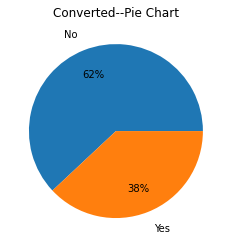

In [341]:
#pieplot of 'Converted' column.
plt.pie(round(Converted_pie.value_counts(normalize=True)*100,2),labels=['No','Yes'],autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2)
plt.title('Converted--Pie Chart')
plt.show()

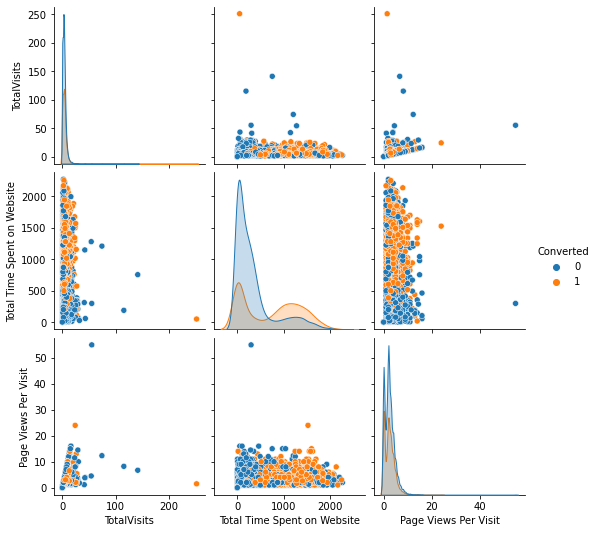

In [342]:
sns.pairplot(num_df,diag_kind='kde',hue='Converted')
plt.show()

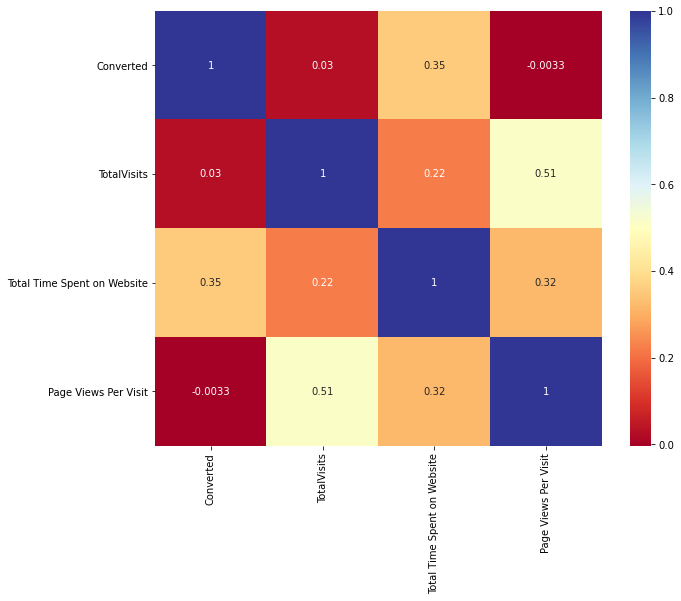

In [343]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(num_df.corr(), cmap="RdYlBu", annot=True)
plt.show()

#### Outlier Treatment

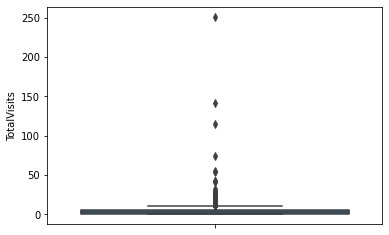

In [344]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=num_df['TotalVisits'])
plt.show()

In [345]:
#checking percentile values for "Total Visits"

num_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

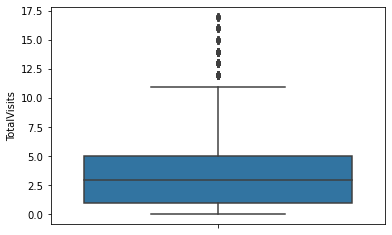

In [346]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = num_df.TotalVisits.quantile(0.99)
num_df = num_df[(num_df.TotalVisits <= Q3)]
Q1 = num_df.TotalVisits.quantile(0.01)
num_df = num_df[(num_df.TotalVisits >= Q1)]
sns.boxplot(y=num_df['TotalVisits'])
plt.show()




In [347]:
Q3 = lead_df2.TotalVisits.quantile(0.99)
lead_df2 = lead_df2[(lead_df2.TotalVisits <= Q3)]
Q1 = lead_df2.TotalVisits.quantile(0.01)
lead_df2 = lead_df2[(lead_df2.TotalVisits >= Q1)]

In [348]:
#checking percentiles for "Total Time Spent on Website"

num_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

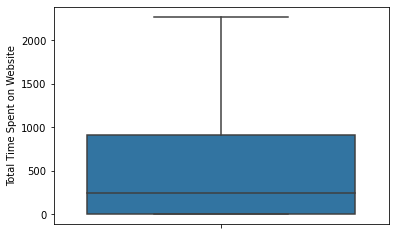

In [349]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=num_df['Total Time Spent on Website'])
plt.show()

In [350]:
#checking spread of "Page Views Per Visit"

num_df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

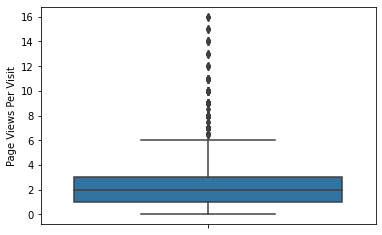

In [351]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=num_df['Page Views Per Visit'])
plt.show()

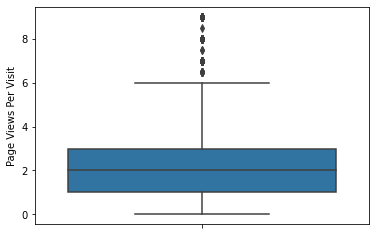

In [352]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = num_df['Page Views Per Visit'].quantile(0.99)
num_df = num_df[num_df['Page Views Per Visit'] <= Q3]
Q1 = num_df['Page Views Per Visit'].quantile(0.01)
num_df = num_df[num_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=num_df['Page Views Per Visit'])
plt.show()

In [353]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_df2['Page Views Per Visit'].quantile(0.99)
lead_df2 = lead_df2[lead_df2['Page Views Per Visit'] <= Q3]
Q1 = lead_df2['Page Views Per Visit'].quantile(0.01)
lead_df2 = lead_df2[lead_df2['Page Views Per Visit'] >= Q1]


In [354]:
lead_df2.shape

(8953, 13)

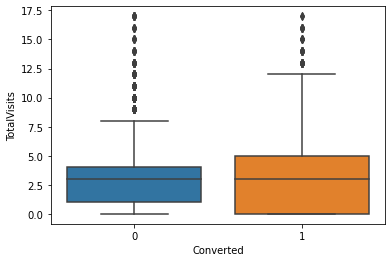

In [355]:
sns.boxplot(x=num_df.Converted, y=num_df['TotalVisits'])
plt.show()

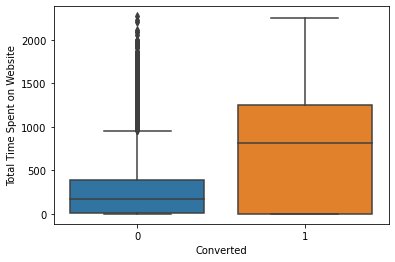

In [356]:
sns.boxplot(x=num_df.Converted, y=num_df['Total Time Spent on Website'])
plt.show()

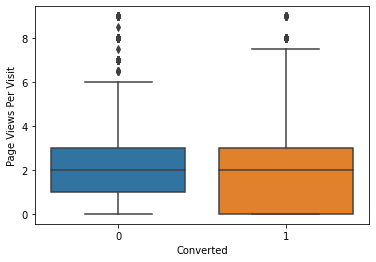

In [357]:
sns.boxplot(x=num_df.Converted, y=num_df['Page Views Per Visit'])
plt.show()

In [358]:
Null_perc_features(lead_df2)

,Features,Null_percent
0,Lead Origin,0.0
1,Lead Source,0.0
2,Converted,0.0
3,TotalVisits,0.0
4,Total Time Spent on Website,0.0
5,Page Views Per Visit,0.0
6,Last Activity,0.0
7,Specialization,0.0
8,What is your current occupation,0.0
9,Tags,0.0


In [359]:
# Percentage of data retained
len(lead_df2)/len(lead_df)*100

96.8939393939394

### Data Preparation

In [360]:
cat_cols=lead_df2.loc[:,lead_df2.dtypes==object].columns
cat_cols=list(cat_cols)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### Checkpoint--3

In [361]:
lead_df3=lead_df2.copy()

In [362]:
#Replace({'Yes':1,'No':0})

lead_df3['A free copy of Mastering The Interview']=lead_df3['A free copy of Mastering The Interview'].replace({'Yes':1,'No':0})

In [363]:
cat_cols.remove('A free copy of Mastering The Interview')

In [364]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead_df3[['Lead Origin']], drop_first=True)

lead_df3 = pd.concat([lead_df3,dummy],1)
dummy = pd.get_dummies(lead_df3['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Missing'], 1)
lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [365]:
#dummy = pd.get_dummies(lead_df3['City'], prefix  = 'City')
#dummy = dummy.drop(['City_Missing'], 1)
#lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [366]:
dummy = pd.get_dummies(lead_df3['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Missing'], 1)
lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [367]:
dummy = pd.get_dummies(lead_df3['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [368]:
dummy = pd.get_dummies(lead_df3['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [369]:
dummy = pd.get_dummies(lead_df3['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [370]:
#Tags are given by sales team based on customers information makes it unreliable for prediction.
#dummy = pd.get_dummies(lead_df3['Tags'], prefix  = 'Tags')
#dummy = dummy.drop(['Tags_Missing'], 1)
#lead_df3 = pd.concat([lead_df3, dummy], axis = 1)

In [371]:
#dropping the original columns after dummy variable creation

lead_df3.drop(cat_cols,1,inplace = True)

In [372]:
lead_df3.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [373]:
lead_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   A free copy of Mastering The Interview                8953 non-null   int64  
 5   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 7   Lead Origin_Lead Import                               8953 non-null   uint8  
 8   Specialization_Banking, Investment And Insurance      8953

In [374]:
lead_df3.shape

(8953, 46)

## Train-Test Split & Logistic Regression Model Building:

#### Checkpoint--4

In [375]:
lead_df_final = lead_df3.copy()

In [376]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_df_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [377]:
X=lead_df_final.drop('Converted', axis=1)

In [378]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [379]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   A free copy of Mastering The Interview                6267 non-null   int64  
 4   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 6   Lead Origin_Lead Import                               6267 non-null   uint8  
 7   Specialization_Banking, Investment And Insurance      6267 non-null   uint8  
 8   Specialization_Business Administration                6

In [380]:
X_train.shape

(6267, 45)

In [381]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,-0.667339,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,-0.667339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### Model Building using Stats Model & RFE:

In [382]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [383]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 22)            # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [384]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False])

In [385]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 23),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 8),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_International Business', False, 6),
 ('Specialization_Management_Specializations', False, 7),
 ('Specialization_Media and Advertising', False, 11),
 ('Specialization_Rural and Agribusiness', False, 3),
 ('Specialization_Services Excellence', False, 20),
 ('Specialization_Travel and Tourism', False, 10),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('W

In [386]:
#list of RFE supported columns
cols = X_train.columns[rfe.support_]
cols = list(cols)
cols

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Businessman',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [387]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [388]:

#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
    print(logm.summary())
    return logm

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [389]:
# Model-1
build_model(cols)
print('\n')
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6244
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.4
Date:                Wed, 12 Jan 2022   Deviance:                       5036.8
Time:                        19:59:42   Pearson chi2:                 6.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [390]:
# Removing 'What is your current occupation_Housewife' because of high p-value
cols.remove('What is your current occupation_Housewife')

In [391]:
cols

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Businessman',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [392]:
# Model-2
build_model(cols)
print('\n')
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6245
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.4
Date:                Wed, 12 Jan 2022   Deviance:                       5050.8
Time:                        19:59:43   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [393]:
# Removing 'Last Activity_Email Bounced' because of high p-value
cols.remove('What is your current occupation_Other')
cols

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Businessman',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [394]:
# Model-3
build_model(cols)
print('\n')
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.7
Date:                Wed, 12 Jan 2022   Deviance:                       5053.3
Time:                        19:59:44   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [395]:
cols.remove('Last Notable Activity_Email Opened')
cols

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Businessman',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [396]:
# Model-4
build_model(cols)
print('\n')
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.3
Date:                Wed, 12 Jan 2022   Deviance:                       5082.7
Time:                        19:59:45   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [397]:
cols.remove('Last Activity_Email Opened')
cols

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Businessman',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [398]:
# Model-5
build_model(cols)
print('\n')
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.7
Date:                Wed, 12 Jan 2022   Deviance:                       5083.4
Time:                        19:59:45   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [399]:
len(cols)

18

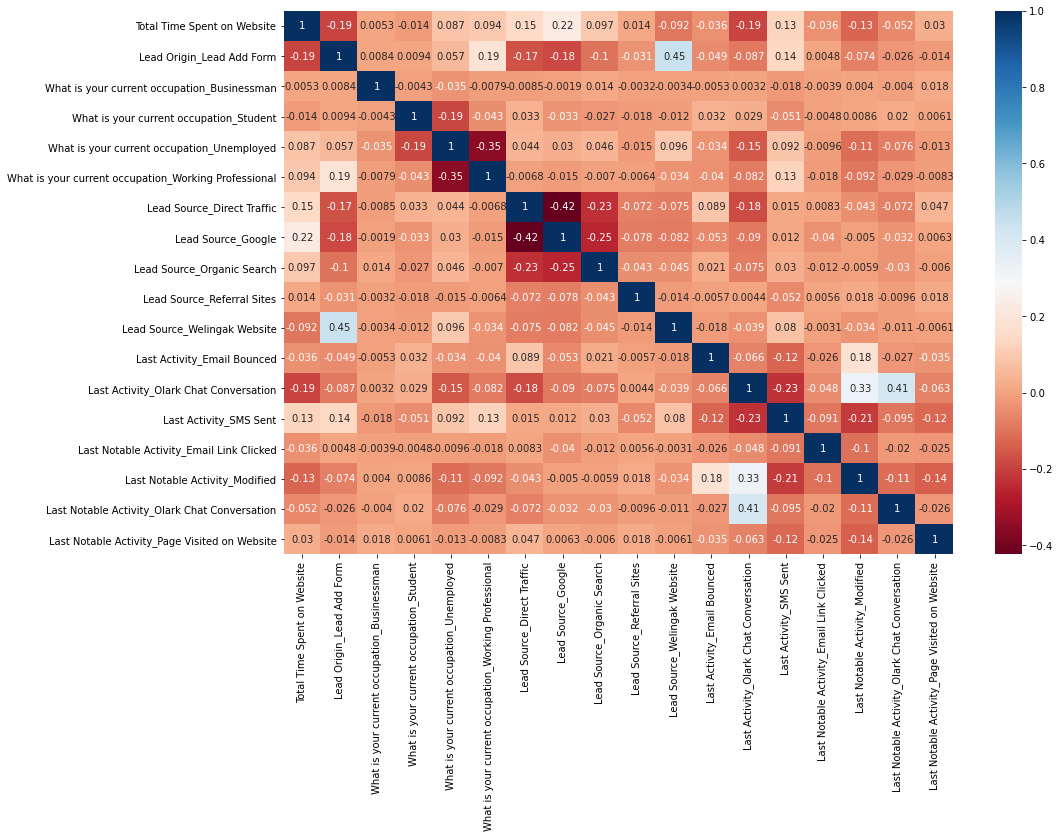

In [400]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(lead_df_final[cols].corr(), cmap='RdBu', annot=True)
plt.show()

### Final Model

In [401]:
X_train_sm = sm.add_constant(X_train[cols])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [402]:
# Getting the Predicted values on the train set
y_train_pred = logm.predict(X_train_sm)
y_train_pred[:10]

9196    0.918573
4696    0.472103
3274    0.191300
2164    0.070140
1667    0.659315
7024    0.371553
8018    0.024125
778     0.082316
6942    0.096579
4440    0.062160
dtype: float64

In [403]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
9196,1,0.918573,9196
4696,0,0.472103,4696
3274,0,0.191300,3274
2164,0,0.070140,2164
1667,1,0.659315,1667


In [404]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
9196,1,0.918573,9196,1
4696,0,0.472103,4696,0
3274,0,0.191300,3274,0
2164,0,0.070140,2164,0
1667,1,0.659315,1667,1


In [405]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3471  411]
 [ 739 1646]]


In [406]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8164991223871071


In [407]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [408]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.690146750524109

In [409]:
# Let us calculate specificity
TN / float(TN+FP)

0.8941267387944358

In [410]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10587326120556415


In [411]:
# positive predictive value 
print (TP / float(TP+FP))

0.8001944579484687


In [412]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8244655581947743


### Plotting ROC CURVE

In [413]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [414]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

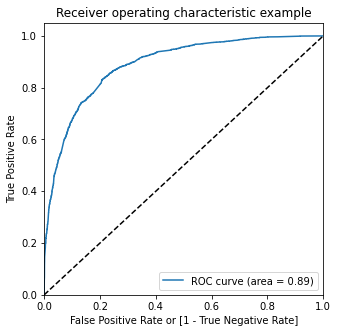

In [415]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.89 indicating a good predictive model.

#### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [416]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.918573,9196,1,1,1,1,1,1,1,1,1,1,1
4696,0,0.472103,4696,0,1,1,1,1,1,0,0,0,0,0
3274,0,0.191300,3274,0,1,1,0,0,0,0,0,0,0,0
2164,0,0.070140,2164,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.659315,1667,1,1,1,1,1,1,1,1,0,0,0


In [417]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.639221  0.968973  0.436631
0.2   0.2  0.752673  0.916981  0.651726
0.3   0.3  0.796394  0.861635  0.756311
0.4   0.4  0.812510  0.764780  0.841834
0.5   0.5  0.816499  0.690147  0.894127
0.6   0.6  0.806287  0.622222  0.919371
0.7   0.7  0.784905  0.515304  0.950541
0.8   0.8  0.759055  0.418029  0.968573
0.9   0.9  0.715653  0.272537  0.987893


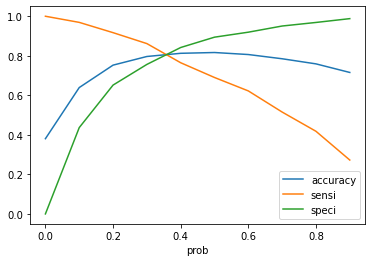

In [418]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [419]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
9196,1,0.918573,9196,1,1,1,1,1,1,1,1,1,1,1,1
4696,0,0.472103,4696,0,1,1,1,1,1,0,0,0,0,0,1
3274,0,0.191300,3274,0,1,1,0,0,0,0,0,0,0,0,0
2164,0,0.070140,2164,0,1,0,0,0,0,0,0,0,0,0,0
1667,1,0.659315,1667,1,1,1,1,1,1,1,1,0,0,0,1


In [420]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
9196,1,0.918573,9196,1,92
4696,0,0.472103,4696,1,47
3274,0,0.191300,3274,0,19
2164,0,0.070140,2164,0,7
1667,1,0.659315,1667,1,66


In [421]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8054890697303335

In [422]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2


array([[3055,  827],
       [ 392, 1993]], dtype=int64)

In [423]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [424]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8356394129979036

In [425]:
# Let us calculate specificity
TN / float(TN+FP)

0.7869654817104585

#### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88-0.89, which is very good. We have the following values for the Train Data:

Accuracy : 80.54%

Sensitivity : 83.56%

Specificity : 78.69%

In [426]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.21303451828954148


In [427]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7067375886524823


In [428]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8862779228314477


#### Precision-Recall Method

In [429]:
#Looking at the confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion3

array([[3055,  827],
       [ 392, 1993]], dtype=int64)

In [430]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [431]:
# Precision
TP / float(TP + FP)

0.7067375886524823

In [432]:
# Recall
TN / float(TN+FP)

0.7869654817104585

In [433]:
from sklearn.metrics import precision_score, recall_score

In [434]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7067375886524823

In [435]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8356394129979036

In [436]:
from sklearn.metrics import precision_recall_curve

In [437]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

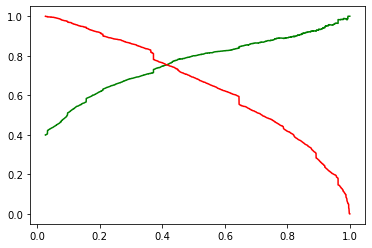

In [438]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [439]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1.448461,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1.448461,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1.448461,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1.448461,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,-0.690388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [440]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Businessman,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7681,-0.311318,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
984,-0.550262,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
8135,0.812462,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6915,-0.628665,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2712,-0.421456,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [441]:
X_test_sm = sm.add_constant(X_test)

### Predictions on TEST SET

In [442]:
y_test_pred = logm.predict(X_test_sm)

In [443]:
y_test_pred[:10]

7681    0.399226
984     0.242113
8135    0.413669
6915    0.199569
2712    0.237945
244     0.193024
4698    0.116536
8287    0.031747
6791    0.502942
8970    0.139091
dtype: float64

In [444]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
7681,0.399226
984,0.242113
8135,0.413669
6915,0.199569
2712,0.237945


In [445]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [446]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [447]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [448]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [449]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.399226
1,0,984,0.242113
2,0,8135,0.413669
3,0,6915,0.199569
4,1,2712,0.237945


In [450]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.399226
1,0,984,0.242113
2,0,8135,0.413669
3,0,6915,0.199569
4,1,2712,0.237945


In [451]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.399226,40
1,984,0,0.242113,24
2,8135,0,0.413669,41
3,6915,0,0.199569,20
4,2712,1,0.237945,24


In [452]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.399226,40,1
1,984,0,0.242113,24,0
2,8135,0,0.413669,41,1
3,6915,0,0.199569,20,0
4,2712,1,0.237945,24,0


In [453]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7997021593447505

In [454]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion4

array([[1271,  405],
       [ 133,  877]], dtype=int64)

In [455]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [456]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8683168316831683

In [457]:
# Let us calculate specificity
TN / float(TN+FP)

0.7583532219570406

In [458]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6840873634945398

In [459]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8683168316831683

### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 79.97%

Sensitivity : 86.83%

Specificity : 75.83%

### Final Observation:
Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 80.54%

Sensitivity : 83.56%

Specificity : 78.69%

Test Data: 

Accuracy : 79.97%

Sensitivity : 86.83%

Specificity : 75.83%

### Conclusion

##### Top Features contributing for high Conversion Rate:

--What is your current occupation--Working Professional.

--What is your current occupation--Businessman.

--What is your current occupation--Student.

--Lead Source--Welingak Website.

--Lead Origin--Lead Add Form.

--Total Time Spent on Website.

##### Top features to focus to increase Conversion Rate:

--Lead Source--Direct Traffic.

--Lead Source--Google.

--Lead Source--Organic Search.

--Lead Source--Referral Sites.

--Last Activity--Email Bounced.